# 9. 6. Classifying images made with webcam with Pre-trained Networks: Using MobileNetV2 and InceptionV3 

## 1. Collect a data-set of images


- Clone the [imageclassifier](https://github.com/bonartm/imageclassifier) repository from here.

- Try out imageclassifier, by following the instructions in the README.md:

    - python src/capture.py output-folder

    - the program launches your webcam

    - take pictures by pressing space

    - pictures are saved in the folder output-folder (e.g. data/faces/)

    - exit the program with q



## 2. Load the last image 

In [2]:
import glob
import os 

PATH = os.path.abspath('')

list_of_files = glob.glob(PATH + os.sep + '/imageclassifier-main/src/images/*') # * means all if need specific format then *.csv
last_file = max(list_of_files, key=os.path.getctime)

## 3. Classification with MobileNet V2

#### Step 1: Reading and preprocessing an image

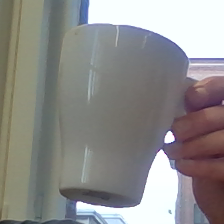

In [4]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# load the image from the path
# resize the image to 224 by 224
# print the image
im = image.load_img(last_file, target_size=(224, 224))
im 

In [5]:
# convert image to an array
array = image.img_to_array(im)

In [6]:
array.dtype

dtype('float32')

In [7]:
array.shape

(224, 224, 3)

In [8]:
# preprocess the input, normalizing 
array = preprocess_input(array)

In [9]:
# reshape the array to (1, 224, 224, 3)
array = array.reshape(1, 224, 224, 3)

In [10]:
array.shape

(1, 224, 224, 3)

#### Step 2: Loading MobileNetV2

In [11]:
# Import and initialize the model.
mobilenet = MobileNetV2()
# mobilenet.summary()

2022-03-06 19:48:25.715358: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-06 19:48:25.715566: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-06 19:48:25.716329: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


#### Step 3: Prediction

In [12]:
# predict the probabilities of 1000 classes and print the 10 most probable ones:

predictions = mobilenet.predict(array)

2022-03-06 19:48:27.038693: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-06 19:48:27.057403: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz


In [13]:
from pprint import pprint

pprint(decode_predictions(predictions, 10))

[[('n03623198', 'knee_pad', 0.06971102),
  ('n04208210', 'shovel', 0.05377114),
  ('n03041632', 'cleaver', 0.04822929),
  ('n04270147', 'spatula', 0.047484506),
  ('n04023962', 'punching_bag', 0.03346989),
  ('n03759954', 'microphone', 0.02955464),
  ('n03255030', 'dumbbell', 0.022976434),
  ('n03063599', 'coffee_mug', 0.018645747),
  ('n03691459', 'loudspeaker', 0.016806293),
  ('n03527444', 'holster', 0.013235027)]]


#### Step 4: Inspect intermediate output

In [14]:
# visualize the intermediate output of each CNN layer

from tensorflow.keras import Model

intermediate_layer_model = Model(inputs=mobilenet.input,
                                 outputs=[
                                     mobilenet.get_layer(index=2).output,
                                     mobilenet.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(array)
cnn2.shape, cnn100.shape


((1, 112, 112, 32), (1, 14, 14, 576))

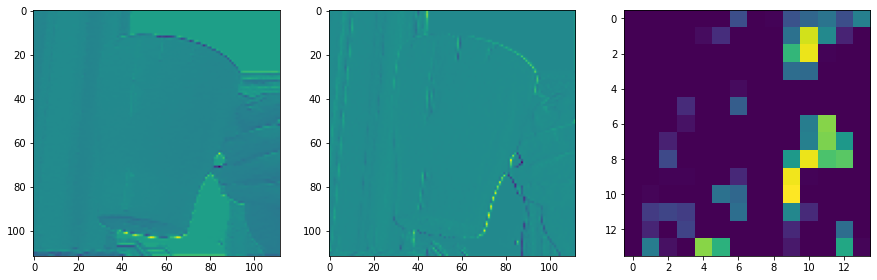

In [15]:
#  visualize a few feature maps

from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])

plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])

plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 0])

## 4. Classification with InspectionV3

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input

#### Step 1: Reading an image

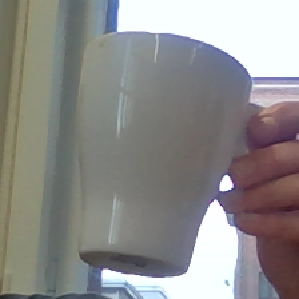

In [17]:
# load the image from the path
# resize the image to 299 by 299
# print the image
img_inception = image.load_img(last_file, target_size=(299, 299))
img_inception

In [18]:
# convert image to an array
array_inception = image.img_to_array(img_inception)

In [19]:
# preprocess the input
array_inception = preprocess_input(array_inception)

In [20]:
# reshape the array to (1, 299, 299, 3)
array_inception = array_inception.reshape(1, 299, 299, 3)

In [21]:
array_inception.shape

(1, 299, 299, 3)

#### Step 2: Loading InceptionV3

In [22]:
# instantiates the Inception v3 architecture
inception_model = InceptionV3()

#### Step 3: Prediction

In [23]:
# predict
predictions_inc = inception_model.predict(array_inception)

In [24]:
pprint(decode_predictions(predictions_inc, 10))

[[('n03063599', 'coffee_mug', 0.5249913),
  ('n02823750', 'beer_glass', 0.111266784),
  ('n03443371', 'goblet', 0.07947463),
  ('n07930864', 'cup', 0.07830504),
  ('n03950228', 'pitcher', 0.02607199),
  ('n07615774', 'ice_lolly', 0.013403781),
  ('n04560804', 'water_jug', 0.011843724),
  ('n07920052', 'espresso', 0.010466928),
  ('n04579145', 'whiskey_jug', 0.0053637708),
  ('n04522168', 'vase', 0.004555853)]]


### Step 4: Inspect intermediate output

In [25]:
intermediate_layer_model = Model(inputs=inception_model.input,
                                 outputs=[
                                     inception_model.get_layer(index=2).output,
                                     inception_model.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(array_inception)
cnn2.shape, cnn100.shape

((1, 149, 149, 32), (1, 17, 17, 768))

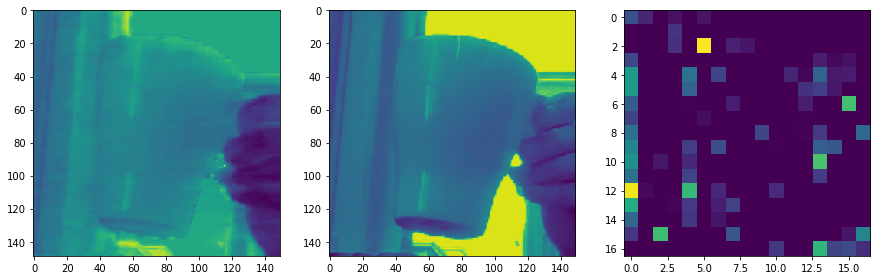

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])
plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])
plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 3])